<a href="https://colab.research.google.com/github/palshalinigithub/corona_test/blob/main/corona_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>



```
# This is formatted as code
```

# Introduction of the Project


A COVID-19 proposal is essential to address the pandemic's challenges effectively, including controlling its spread, providing medical care, protecting the vulnerable, and mitigating its socio-economic consequences. Accurate disease prediction plays a crucial role in improving patient outcomes and optimizing healthcare resources. By focusing on early diagnosis, personalized treatment, efficient resource allocation, and proactive disease prevention, governments, organizations, and communities can effectively manage and overcome the pandemic. These strategies facilitate timely interventions, tailored care, and targeted preventive measures, ensuring the best possible outcomes for individuals and mitigating the impact on society and the economy.

# Description of dataset-

The following list describes each of the dataset’s features used by the model: 


A. Basic information: 

1. ID (Individual ID)

2. Sex (male/female). 

3. Age ≥60 above years (true/false) 

4. Test date (date when tested for COVID)


B. Symptoms: 

5. Cough (true/false).

6. Fever (true/false). 

7. Sore throat (true/false). 

8. Shortness of breath (true/false). 

9. Headache (true/false). 


C. Other information: 

10. Known contact with an individual confirmed to have COVID-19 (true/false).


D. Covid report

11. Corona positive or negative

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")



In [54]:
# load the dataset
corona_test = pd.read_csv("/content/corona_tested_006.csv")
corona_test
test=corona_test.copy()
test

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other


In [55]:
test.head()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,None,None,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,None,None,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,None,None,Contact with confirmed


In [56]:
test.tail()

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
278843,278844,30-04-2020,False,False,False,False,False,positive,None,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,None,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,None,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,None,male,Other
278847,278848,30-04-2020,False,False,False,False,False,negative,None,female,Other


In [57]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278848 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               278848 non-null  int64 
 1   Test_date            278848 non-null  object
 2   Cough_symptoms       278848 non-null  object
 3   Fever                278848 non-null  object
 4   Sore_throat          278848 non-null  object
 5   Shortness_of_breath  278848 non-null  object
 6   Headache             278848 non-null  object
 7   Corona               278848 non-null  object
 8   Age_60_above         278848 non-null  object
 9   Sex                  278848 non-null  object
 10  Known_contact        278848 non-null  object
dtypes: int64(1), object(10)
memory usage: 23.4+ MB


In [58]:
test.shape

(278848, 11)

In [59]:
test.columns

Index(['Ind_ID', 'Test_date', 'Cough_symptoms', 'Fever', 'Sore_throat',
       'Shortness_of_breath', 'Headache', 'Corona', 'Age_60_above', 'Sex',
       'Known_contact'],
      dtype='object')

In [60]:
test.describe(include='all')

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
count,278848.000000,278848,278848,278848,278848,278848,278848,278848,278848,278848,278848
unique,NaN,51,5,5,5,5,5,3,3,3,3
top,NaN,20-04-2020,False,False,False,False,False,negative,None,female,Other
freq,NaN,10921,127531,137774,212584,212842,212326,260227,127320,130158,242741
mean,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,80496.628269,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,69712.750000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,139424.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,209136.250000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [61]:
print('Unique value of Cough symptoms-',test['Cough_symptoms'].unique())
print('Unique value of fever-',test['Fever'].unique())
print('Unique value of sore throat-',test['Sore_throat'].unique())
print('Unique value of shortness of breath-',test['Shortness_of_breath'].unique())
print('Unique value of headache-',test['Headache'].unique())
print('Unique value of corona-',test['Corona'].unique())
print('Unique value of age 60 above-',test['Age_60_above'].unique())
print('Unique value of known contact',test['Known_contact'].unique())






Unique value of Cough symptoms- ['TRUE' 'FALSE' 'None' False True]
Unique value of fever- ['FALSE' 'TRUE' 'None' False True]
Unique value of sore throat- ['TRUE' 'FALSE' 'None' False True]
Unique value of shortness of breath- ['FALSE' 'TRUE' 'None' False True]
Unique value of headache- ['FALSE' 'TRUE' 'None' False True]
Unique value of corona- ['negative' 'positive' 'other']
Unique value of age 60 above- ['None' 'No' 'Yes']
Unique value of known contact ['Abroad' 'Contact with confirmed' 'Other']


In [62]:
print('Count value of Cough symptoms-',test['Cough_symptoms'].value_counts())
print('Count value of fever-',test['Fever'].value_counts())
print('Count value of sore throat-',test['Sore_throat'].value_counts())
print('Count  value of shortness of breath-',test['Shortness_of_breath'].value_counts())
print('Count  value of headache-',test['Headache'].value_counts())
print('Count value of corona-',test['Corona'].value_counts())
print('Count value of age 60 above-',test['Age_60_above'].value_counts())
print('Count  value of known contact',test['Known_contact'].value_counts())






Count value of Cough symptoms- False    127531
FALSE    108837
TRUE      21983
True      20245
None        252
Name: Cough_symptoms, dtype: int64
Count value of fever- False    137774
FALSE    119070
TRUE      11750
True      10002
None        252
Name: Fever, dtype: int64
Count value of sore throat- False    212584
FALSE     64337
TRUE       1198
True        728
None          1
Name: Sore_throat, dtype: int64
Count  value of shortness of breath- False    212842
FALSE     64428
TRUE       1107
True        470
None          1
Name: Shortness_of_breath, dtype: int64
Count  value of headache- False    212326
FALSE     64107
TRUE       1428
True        986
None          1
Name: Headache, dtype: int64
Count value of corona- negative    260227
positive     14729
other         3892
Name: Corona, dtype: int64
Count value of age 60 above- None    127320
No      125703
Yes      25825
Name: Age_60_above, dtype: int64
Count  value of known contact Other                     242741
Abroad           

### Basic Analysis-- after checking data i find out data have FALSE,False,TRUE,True,NONE type value so we have to convert it in a simple form and NONE value in nan

In [63]:
rep_test=test.replace(['None','other'],np.nan)


In [64]:
#count missing value
rep_test.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms            252
Fever                     252
Sore_throat                 1
Shortness_of_breath         1
Headache                    1
Corona                   3892
Age_60_above           127320
Sex                     19563
Known_contact               0
dtype: int64

In [65]:
#to check percentage of missing value
rep_test.isnull().sum()/rep_test.shape[0]*100

Ind_ID                  0.000000
Test_date               0.000000
Cough_symptoms          0.090372
Fever                   0.090372
Sore_throat             0.000359
Shortness_of_breath     0.000359
Headache                0.000359
Corona                  1.395742
Age_60_above           45.659284
Sex                     7.015650
Known_contact           0.000000
dtype: float64

# Data Cleaning

In [66]:
#those feature which have missing value drop rowwise
drp_row_test=rep_test.dropna(subset=['Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona'])
drp_row_test


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,TRUE,FALSE,TRUE,FALSE,FALSE,negative,NaN,NaN,Abroad
1,2,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,NaN,NaN,Abroad
2,3,11-03-2020,FALSE,TRUE,FALSE,FALSE,FALSE,positive,NaN,NaN,Abroad
3,4,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,NaN,NaN,Abroad
4,5,11-03-2020,TRUE,FALSE,FALSE,FALSE,FALSE,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,False,False,False,False,False,positive,NaN,male,Other
278844,278845,30-04-2020,False,False,False,False,False,negative,NaN,female,Other
278845,278846,30-04-2020,False,False,False,False,False,negative,NaN,male,Other
278846,278847,30-04-2020,False,False,False,False,False,negative,NaN,male,Other


In [67]:
#after drop check there is any missing value or not
drp_row_test.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Sex                     19034
Known_contact               0
dtype: int64

In [68]:
#check total row and column
drp_row_test.shape

(274702, 11)

<Axes: >

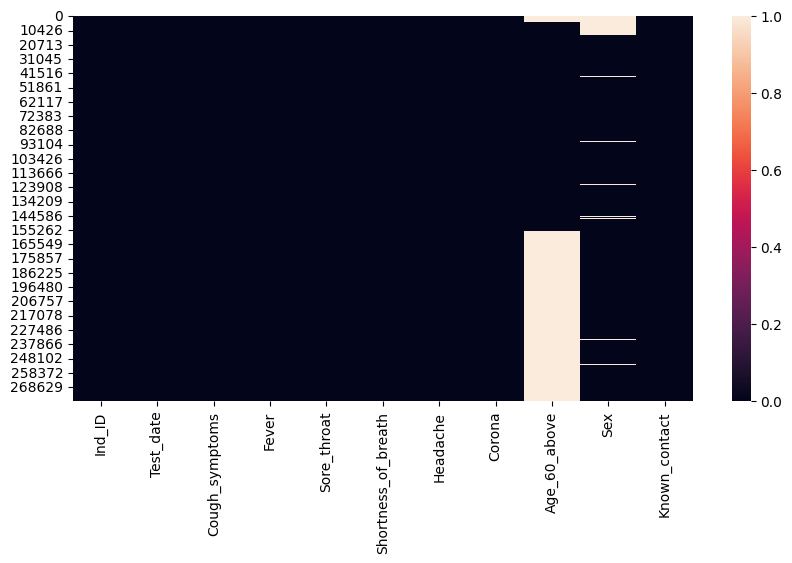

In [69]:
plt.figure(figsize=(10,5))
sns.heatmap(drp_row_test.isnull())

In [70]:
#conert value in equal size- true and false form 
def convert(x):
  if x== True:
       return 'true'
  elif x ==False:
        return 'false'   
  elif x== 'TRUE':
        return x.lower()
  elif x == 'FALSE':
        return x.lower()
  else:
        return x                     

In [71]:
drp_row_test['Cough_symptoms']=drp_row_test['Cough_symptoms'].map(convert)
drp_row_test['Fever']=drp_row_test['Fever'].map(convert)
drp_row_test['Sore_throat']=drp_row_test['Sore_throat'].map(convert)
drp_row_test['Shortness_of_breath']=drp_row_test['Shortness_of_breath'].map(convert)
drp_row_test['Headache']=drp_row_test['Headache'].map(convert)
drp_row_test


,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Age_60_above,Sex,Known_contact
0,1,11-03-2020,true,false,true,false,false,negative,NaN,NaN,Abroad
1,2,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
2,3,11-03-2020,false,true,false,false,false,positive,NaN,NaN,Abroad
3,4,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Abroad
4,5,11-03-2020,true,false,false,false,false,negative,NaN,NaN,Contact with confirmed
...,...,...,...,...,...,...,...,...,...,...,...
278843,278844,30-04-2020,false,false,false,false,false,positive,NaN,male,Other
278844,278845,30-04-2020,false,false,false,false,false,negative,NaN,female,Other
278845,278846,30-04-2020,false,false,false,false,false,negative,NaN,male,Other
278846,278847,30-04-2020,false,false,false,false,false,negative,NaN,male,Other


In [72]:
drp_row_test['Cough_symptoms'].unique()

array(['true', 'false'], dtype=object)

In [73]:
drp_row_test['Fever'].unique()

array(['false', 'true'], dtype=object)

In [74]:
drp_row_test['Sore_throat'].unique()

array(['true', 'false'], dtype=object)

In [75]:
drp_row_test['Shortness_of_breath'].unique()

array(['false', 'true'], dtype=object)

In [76]:
drp_row_test['Headache'].unique()

array(['false', 'true'], dtype=object)

In [77]:
drp_row_test['Age_60_above'].unique()

array([nan, 'No', 'Yes'], dtype=object)

In [78]:
drp_row_test['Sex'].unique()

array([nan, 'male', 'female'], dtype=object)

In [79]:
drp_row_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 274702 entries, 0 to 278847
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   Ind_ID               274702 non-null  int64 
 1   Test_date            274702 non-null  object
 2   Cough_symptoms       274702 non-null  object
 3   Fever                274702 non-null  object
 4   Sore_throat          274702 non-null  object
 5   Shortness_of_breath  274702 non-null  object
 6   Headache             274702 non-null  object
 7   Corona               274702 non-null  object
 8   Age_60_above         149043 non-null  object
 9   Sex                  255668 non-null  object
 10  Known_contact        274702 non-null  object
dtypes: int64(1), object(10)
memory usage: 25.1+ MB


In [80]:
#true:1,   false:0    positive:1     negative:0      No:0       Yes:1

# select the categorical columns you want to one-hot encode
drp_row_test['Cough_symptoms']=pd.get_dummies(drp_row_test['Cough_symptoms'],drop_first=True)
drp_row_test['Fever']=pd.get_dummies(drp_row_test['Fever'],drop_first=True)
drp_row_test['Sore_throat']=pd.get_dummies(drp_row_test['Sore_throat'],drop_first=True)
drp_row_test['Shortness_of_breath']=pd.get_dummies(drp_row_test['Shortness_of_breath'],drop_first=True)
drp_row_test['Headache']=pd.get_dummies(drp_row_test['Headache'],drop_first=True)
drp_row_test['Shortness_of_breath']=pd.get_dummies(drp_row_test['Shortness_of_breath'],drop_first=True)
drp_row_test['Corona']=pd.get_dummies(drp_row_test['Corona'],drop_first=True)








In [81]:
drp_row_test['Known_contact'].replace({'Abroad':0,'Contact with confirmed':1,'Other':2},inplace=True)
drp_row_test['Sex'].replace({'male':0,'female':1},inplace=True)
drp_row_test['Age_60_above'].replace({'No':0,'Yes':1},inplace=True)

In [82]:
drp_row_test['Corona'].value_counts()

0    260008
1     14694
Name: Corona, dtype: int64

In [83]:
drp_row_test.isnull().sum()

Ind_ID                      0
Test_date                   0
Cough_symptoms              0
Fever                       0
Sore_throat                 0
Shortness_of_breath         0
Headache                    0
Corona                      0
Age_60_above           125659
Sex                     19034
Known_contact               0
dtype: int64

# Use KNN imputation to deal with missing value

In [84]:
from sklearn.impute import KNNImputer

# Initialize the KNNImputer with k=5 (number of nearest neighbors to use)
imputer = KNNImputer(n_neighbors=5)
col=['Ind_ID','Cough_symptoms','Fever','Sore_throat','Shortness_of_breath','Headache','Corona','Sex','Known_contact','Age_60_above']

# Fit and transform the dataset using the KNN imputer
X_imputed = imputer.fit_transform(drp_row_test[col])
imput_test=pd.DataFrame(X_imputed,columns=col)




In [85]:
imput_test

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact,Age_60_above
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.6,0.0,0.0
1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0
2,3.0,0.0,1.0,0.0,0.0,0.0,1.0,0.6,0.0,0.0
3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6,0.0,0.0
4,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.6,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
274697,278844.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,2.0,0.2
274698,278845.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,2.0,0.2
274699,278846.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.2
274700,278847.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.2


In [86]:
imput_test['Age_60_above'].unique()

array([0. , 1. , 0.2])

In [87]:
#convert value in 1 and 0 in sex feature
def change(x):
  if x>=0.5:
     return 1
  elif x<0.5:
     return 0
  else:
    return x   

In [88]:
#apply changes in sex column
imput_test['Sex']=imput_test['Sex'].apply(change)
imput_test

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact,Age_60_above
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0.0
1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0.0
2,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0.0
3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0.0
4,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
274697,278844.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2.0,0.2
274698,278845.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0.2
274699,278846.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.2
274700,278847.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0.2


In [89]:
imput_test['Age_60_above']=imput_test['Age_60_above'].apply(change)
imput_test

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact,Age_60_above
0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1,0.0,0
1,2.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0
2,3.0,0.0,1.0,0.0,0.0,0.0,1.0,1,0.0,0
3,4.0,1.0,0.0,0.0,0.0,0.0,0.0,1,0.0,0
4,5.0,1.0,0.0,0.0,0.0,0.0,0.0,1,1.0,0
...,...,...,...,...,...,...,...,...,...,...
274697,278844.0,0.0,0.0,0.0,0.0,0.0,1.0,0,2.0,0
274698,278845.0,0.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
274699,278846.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
274700,278847.0,0.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0


In [90]:
imput_test.isnull().sum()

Ind_ID                 0
Cough_symptoms         0
Fever                  0
Sore_throat            0
Shortness_of_breath    0
Headache               0
Corona                 0
Sex                    0
Known_contact          0
Age_60_above           0
dtype: int64

# Data Visualisation

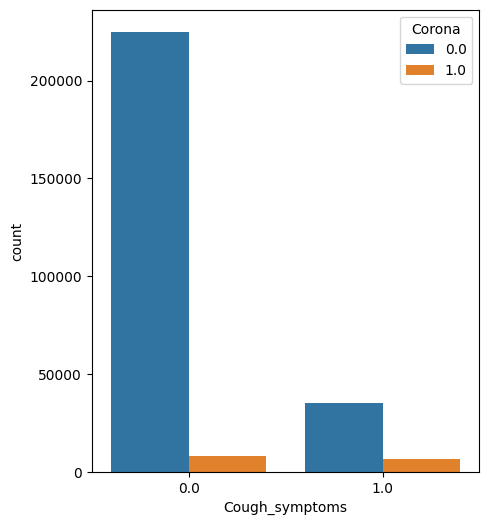

In [91]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Cough_symptoms',hue='Corona',data=imput_test)
plt.show()

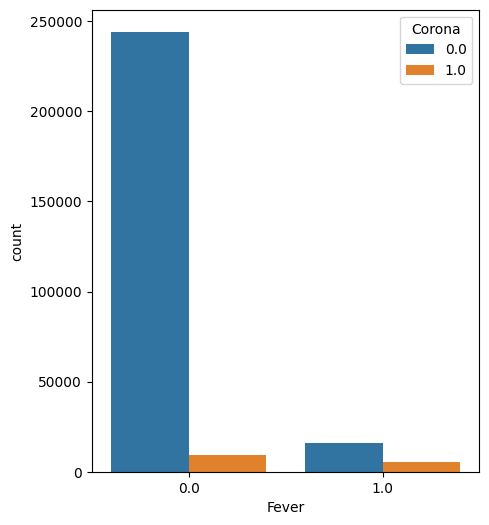

In [92]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Fever',hue='Corona',data=imput_test)
plt.show()

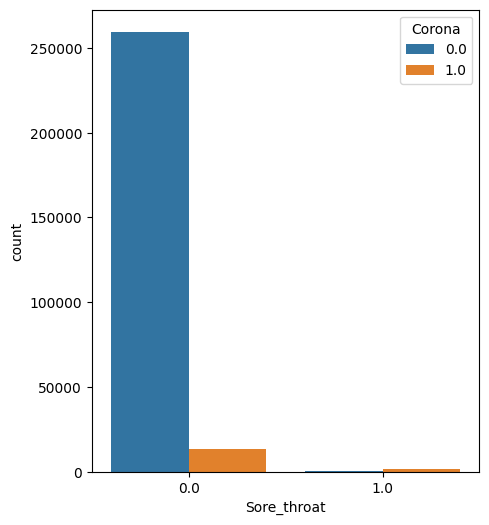

In [93]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Sore_throat',hue='Corona',data=imput_test)
plt.show()

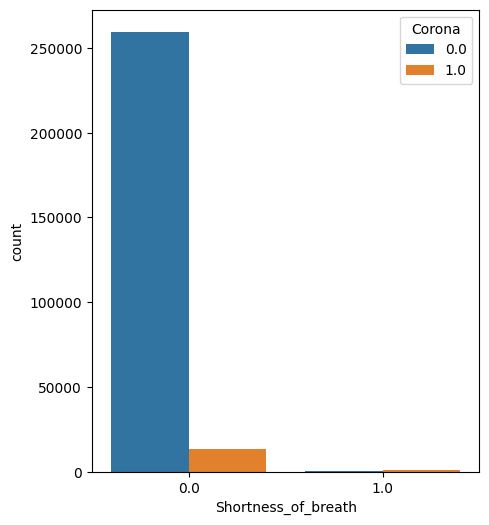

In [94]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Shortness_of_breath',hue='Corona',data=imput_test)
plt.show()

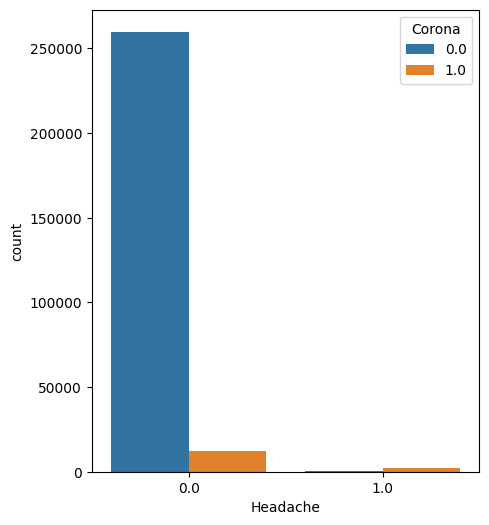

In [95]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Headache',hue='Corona',data=imput_test)
plt.show()

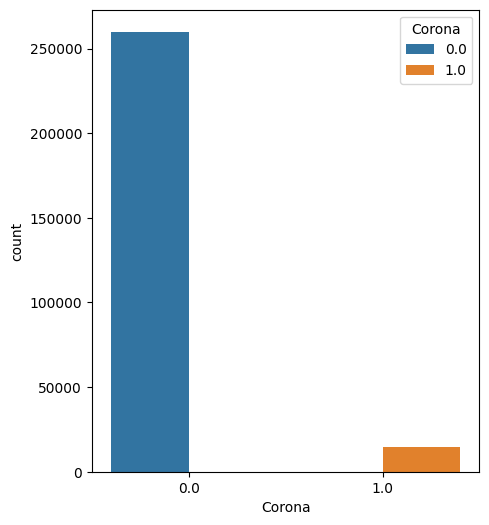

In [96]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Corona',hue='Corona',data=imput_test)
plt.show()

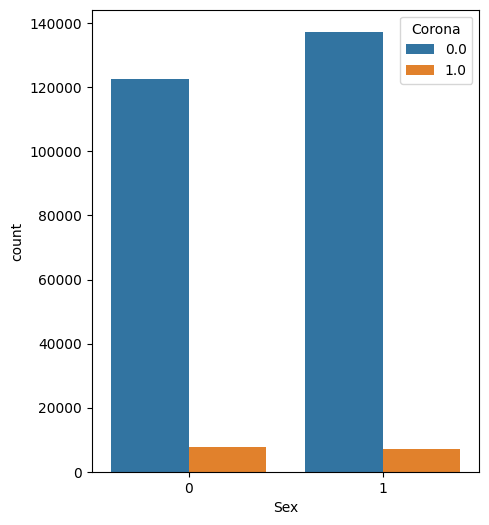

In [97]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Sex',hue='Corona',data=imput_test)
plt.show()

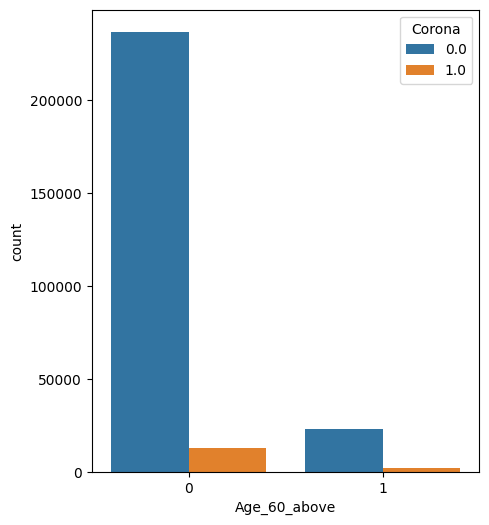

In [98]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Age_60_above',hue='Corona',data=imput_test)
plt.show()

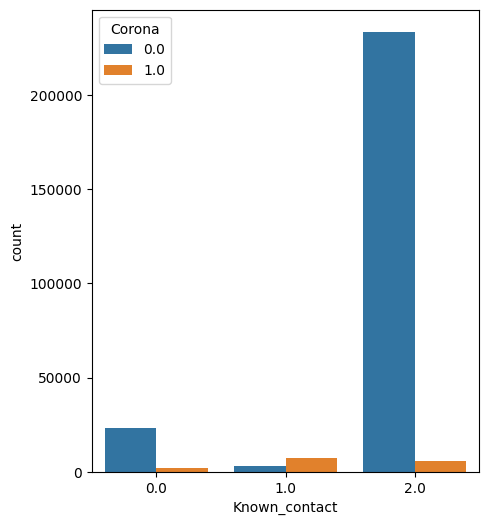

In [99]:
#univariate analysis
plt.figure(figsize=(5,6))
sns.countplot(x='Known_contact',hue='Corona',data=imput_test)
plt.show()

## After seeing this visualization Headache and sore_throat have higher chances to positive corona
##male and female have equal possibility to poistive and negative

# Split Dataset

In [100]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
x=imput_test.drop('Corona',axis=1)
y= imput_test['Corona']
print("shape of X= ",x.shape)
print("shape of X= ",y.shape)

shape of X=  (274702, 9)
shape of X=  (274702,)


In [101]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=12)
print("shape of X_train= ", x_train.shape)
print("shape of Y_train= ", y_train.shape)
print("shape of X_test= ", x_test.shape)
print("shape of Y_test= ", y_test.shape)

shape of X_train=  (219761, 9)
shape of Y_train=  (219761,)
shape of X_test=  (54941, 9)
shape of Y_test=  (54941,)


# Random Forest Classifier Algorithm

In [102]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,accuracy_score
classifier=RandomForestClassifier(n_estimators=50,criterion='gini',random_state=3)
classifier.fit(x_train,y_train)

RandomForestClassifier(n_estimators=50, random_state=3)

In [103]:

y_pred=classifier.predict(x_test)

In [104]:
x_test

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Age_60_above
236663,240520.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
161886,164630.0,1.0,0.0,0.0,0.0,0.0,1,2.0,0
200856,204091.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
185275,188362.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
178116,181136.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
...,...,...,...,...,...,...,...,...,...
41885,42733.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
112235,113978.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
170623,173482.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
42083,42937.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0


In [105]:
accuracy_score(y_test,y_pred)

0.9608853133361243

# Support Vector Classifier

In [106]:
from sklearn.svm import SVC
model=SVC(kernel='rbf')
model.fit(x_train,y_train)


SVC()

In [107]:
model.predict(x_test)

array([0., 0., 0., ..., 0., 0., 0.])

In [108]:
x_test

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Sex,Known_contact,Age_60_above
236663,240520.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
161886,164630.0,1.0,0.0,0.0,0.0,0.0,1,2.0,0
200856,204091.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
185275,188362.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
178116,181136.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
...,...,...,...,...,...,...,...,...,...
41885,42733.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
112235,113978.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0
170623,173482.0,0.0,0.0,0.0,0.0,0.0,1,2.0,0
42083,42937.0,0.0,0.0,0.0,0.0,0.0,0,2.0,0


In [109]:
model.score(x_test,y_test)

0.9463788427585956

## XG Boost Algorithm

In [110]:
import xgboost as xgb
clf = xgb.XGBClassifier(objective='binary:logistic', n_estimators=100, max_depth=3, learning_rate=0.1)

# Train the XGBoost classifier
clf.fit(x_train, y_train)

# Evaluate the XGBoost classifier
score = clf.score(x_test, y_test)
print('Accuracy:', score)

Accuracy: 0.9700951930252453


# Decision Tree Classifier

In [111]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=3)

# Train the decision tree classifier
clf.fit(x_train, y_train)

# Make predictions on the testing set
y_pred = clf.predict(x_test)

# Evaluate the decision tree classifier
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)

Accuracy: 0.9648168034800968


# Logistic Regression Classifier

In [112]:
from sklearn.linear_model import LogisticRegression

# create an instance of logistic regression model
logreg = LogisticRegression()

# fit the model to the training data
logreg.fit(x_train,y_train)

# predict the target values for the test data
y_pred = logreg.predict(x_test)
score = accuracy_score(y_test, y_pred)
print('Accuracy:', score)


Accuracy: 0.9463788427585956


# Those algorithm which is used ,are given below--
accuracy of Random Forest Classifier= 0.9608



accuracy of Support Vector Classifier=0.9463



accuracy of XG boost=0.9700


accuracy of Decision tree classifier= 0.9648

accuracy of logistic Regression =0.9463




```
```

#XGboost Classifier model gives best accuracy


The implementation of an XGBoost Classifier model for identifying COVID-19 patients and providing timely treatment can be instrumental in effectively managing the pandemic. The high accuracy of the XGBoost Classifier model ensures reliable identification of early COVID-19 cases, enabling prompt intervention and care. By leveraging this model, organizations can proactively detect and help individuals who may have contracted the virus, thereby preventing further transmission and protecting the community at large.

## **To get clean data**

In [113]:
#to convert numerical value to categorical to get clean data
imput_test['Sex'].replace({0:'male',1:'female'},inplace=True)
imput_test['Cough_symptoms'].replace({1:'true',0:'false'},inplace=True)
imput_test['Fever'].replace({1:'false',0:'true'},inplace=True)
imput_test['Sore_throat'].replace({1:'false',0:'true'},inplace=True)
imput_test['Shortness_of_breath'].replace({1:'false',0:'true'},inplace=True)
imput_test['Headache'].replace({1:'false',0:'true'},inplace=True)
imput_test['Corona'].replace({0:'negative',1:'positive'},inplace=True)
imput_test['Known_contact'].replace({0:'Abroad',1:'Contact with confirmed',2:'Other'},inplace=True)
imput_test['Age_60_above'].replace({0:'No',1:'Yes'},inplace=True)
imput_test

,Ind_ID,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact,Age_60_above
0,1.0,true,true,false,true,true,negative,female,Abroad,No
1,2.0,false,false,true,true,true,positive,female,Abroad,No
2,3.0,false,false,true,true,true,positive,female,Abroad,No
3,4.0,true,true,true,true,true,negative,female,Abroad,No
4,5.0,true,true,true,true,true,negative,female,Contact with confirmed,No
...,...,...,...,...,...,...,...,...,...,...
274697,278844.0,false,true,true,true,true,positive,male,Other,No
274698,278845.0,false,true,true,true,true,negative,female,Other,No
274699,278846.0,false,true,true,true,true,negative,male,Other,No
274700,278847.0,false,true,true,true,true,negative,male,Other,No


In [114]:
#to merge categorical or numerical data
df1=pd.DataFrame(drp_row_test)
df2=pd.DataFrame(imput_test)
merge_data=pd.merge(df1,df2,on='Ind_ID',how='inner')
merge_data

,Ind_ID,Test_date,Cough_symptoms_x,Fever_x,Sore_throat_x,Shortness_of_breath_x,Headache_x,Corona_x,Age_60_above_x,Sex_x,Known_contact_x,Cough_symptoms_y,Fever_y,Sore_throat_y,Shortness_of_breath_y,Headache_y,Corona_y,Sex_y,Known_contact_y,Age_60_above_y
0,1,11-03-2020,1,0,1,0,0,0,NaN,NaN,0,true,true,false,true,true,negative,female,Abroad,No
1,2,11-03-2020,0,1,0,0,0,1,NaN,NaN,0,false,false,true,true,true,positive,female,Abroad,No
2,3,11-03-2020,0,1,0,0,0,1,NaN,NaN,0,false,false,true,true,true,positive,female,Abroad,No
3,4,11-03-2020,1,0,0,0,0,0,NaN,NaN,0,true,true,true,true,true,negative,female,Abroad,No
4,5,11-03-2020,1,0,0,0,0,0,NaN,NaN,1,true,true,true,true,true,negative,female,Contact with confirmed,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
274697,278844,30-04-2020,0,0,0,0,0,1,NaN,0.0,2,false,true,true,true,true,positive,male,Other,No
274698,278845,30-04-2020,0,0,0,0,0,0,NaN,1.0,2,false,true,true,true,true,negative,female,Other,No
274699,278846,30-04-2020,0,0,0,0,0,0,NaN,0.0,2,false,true,true,true,true,negative,male,Other,No
274700,278847,30-04-2020,0,0,0,0,0,0,NaN,0.0,2,false,true,true,true,true,negative,male,Other,No


In [115]:
#drop all numerical feature
clean_data=merge_data.drop(['Cough_symptoms_x','Fever_x','Sore_throat_x','Shortness_of_breath_x','Headache_x','Corona_x','Sex_x','Known_contact_x','Age_60_above_x'],axis=1)
clean_data

,Ind_ID,Test_date,Cough_symptoms_y,Fever_y,Sore_throat_y,Shortness_of_breath_y,Headache_y,Corona_y,Sex_y,Known_contact_y,Age_60_above_y
0,1,11-03-2020,true,true,false,true,true,negative,female,Abroad,No
1,2,11-03-2020,false,false,true,true,true,positive,female,Abroad,No
2,3,11-03-2020,false,false,true,true,true,positive,female,Abroad,No
3,4,11-03-2020,true,true,true,true,true,negative,female,Abroad,No
4,5,11-03-2020,true,true,true,true,true,negative,female,Contact with confirmed,No
...,...,...,...,...,...,...,...,...,...,...,...
274697,278844,30-04-2020,false,true,true,true,true,positive,male,Other,No
274698,278845,30-04-2020,false,true,true,true,true,negative,female,Other,No
274699,278846,30-04-2020,false,true,true,true,true,negative,male,Other,No
274700,278847,30-04-2020,false,true,true,true,true,negative,male,Other,No


In [116]:
clean_dataset=clean_data.rename(columns={'Cough_symptoms_y':'Cough_symptoms','Fever_y':'Fever','Sore_throat_y':'Sore_throat',
                           'Shortness_of_breath_y':'Shortness_of_breath','Headache_y':'Headache','Corona_y':'Corona',
                           'Sex_y':'Sex','Known_contact_y':'Known_contact','Age_60_above_y':'Age_60_above'})

In [117]:
#now convert clean data into csv fileclean
clean_dataset.to_csv('clean_dataset.csv',index=True)


In [118]:
#this is for check that our data sucessfully converted
corona_data=pd.read_csv("clean_dataset.csv")


In [119]:
d_test=corona_data.drop('Unnamed: 0',axis=1)
d_test

,Ind_ID,Test_date,Cough_symptoms,Fever,Sore_throat,Shortness_of_breath,Headache,Corona,Sex,Known_contact,Age_60_above
0,1,11-03-2020,True,True,False,True,True,negative,female,Abroad,No
1,2,11-03-2020,False,False,True,True,True,positive,female,Abroad,No
2,3,11-03-2020,False,False,True,True,True,positive,female,Abroad,No
3,4,11-03-2020,True,True,True,True,True,negative,female,Abroad,No
4,5,11-03-2020,True,True,True,True,True,negative,female,Contact with confirmed,No
...,...,...,...,...,...,...,...,...,...,...,...
274697,278844,30-04-2020,False,True,True,True,True,positive,male,Other,No
274698,278845,30-04-2020,False,True,True,True,True,negative,female,Other,No
274699,278846,30-04-2020,False,True,True,True,True,negative,male,Other,No
274700,278847,30-04-2020,False,True,True,True,True,negative,male,Other,No
